In [1]:
import pyfolio as pf
import matplotlib.pyplot as plt
import pandas as pd
import backtrader as bt

c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [11]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt
import quantstats

'''# Define the parameters for the strategy
sma_period = 20
bollinger_stddev = 2'''

# Create a Stratey
class MyStrategy(bt.Strategy):
    '''def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Calculate the Simple Moving Average (SMA) and Bollinger Bands
        self.sma = bt.indicators.SMA(self.data, period=sma_period)
        self.bollinger = bt.indicators.BollingerBands(self.data, devfactor=bollinger_stddev)
        
        
    def next(self):
        # If the SMA and middle Bollinger Band line cross, then buy if the data goes up
        # or sell if the data goes down
        self.log('Close, %.2f' % self.data.close[0])
        if (self.data > self.sma) and (self.data > self.bollinger.mid):
            self.log('BUY CREATE, %.2f' % self.data.close[0])
            self.buy()
        elif (self.data < self.sma) and (self.data < self.bollinger.mid):
            self.log('SELL CREATE, %.2f' % self.data.close[0])
            self.sell()'''
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}') #Print date and close
        self.log_pnl.append(f'{dt.isoformat()} {txt}')

    def __init__(self):
        # Create SMA and BB indicators
        self.log_pnl = []
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=20)
        self.bb = bt.indicators.BollingerBands(self.data, period=20)
    
    def next(self):
        # Check if SMA and BB line cross
        if self.sma > self.bb.lines.mid and self.data.close > self.data.open:
            self.buy()
        elif self.sma < self.bb.lines.mid and self.data.close < self.data.open:
            self.sell()

    def stop(self):
        with open('custom_log.csv', 'w') as e:
            for line in self.log_file:
                e.write(line + '\n')

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='../Data/Nifty/nifty_1day_continous.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2007, 1, 2),
        # Do not pass values before this date
        todate=datetime.datetime(2010, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)
    
    # Add a strategy
    cerebro.addstrategy(MyStrategy)

    cerebro.addwriter(bt.WriterFile, csv=True, out='log.csv')
    cerebro.run()
    '''results = cerebro.run()
    strat = results[0]
    portfolio_stats = strat.analyzers.getbyname('PyFolio')
    returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
    returns.index = returns.index.tz_convert(None)

    returns.to_csv('returns.csv')'''
    # Set our desired cash start
    #cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    #print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Create an instance of an Analyzer subclass and add it to the Cerebro object
    #cerebro.addanalyzer(bt.analyzers.SharpeRatio,_name='sharpratio')

    # Run over everything
    #cerebro.run()

    # Print out the final result
    #print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    '''# Get the results of the backtest
    results = cerebro.get_analysis()

    # Convert the results to a Pandas DataFrame
    df = pd.DataFrame(results)

    # Save the DataFrame to a CSV file
    df.to_csv('backtest_results.csv')'''

AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Strateg' object has no attribute 'log_file'

2007-02-22, Close, 522165791.00
2007-02-22, BUY CREATE, 522165791.00
2007-02-23, Order Canceled/Margin/Rejected
2007-02-23, Close, 524935570.00
2007-02-23, BUY CREATE, 524935570.00
2007-02-27, Order Canceled/Margin/Rejected
2007-02-27, Close, 404244314.00
2007-02-28, Close, 566851862.00
2007-02-28, BUY CREATE, 566851862.00
2007-03-01, Order Canceled/Margin/Rejected
2007-03-01, Close, 553669621.00
2007-03-01, BUY CREATE, 553669621.00
2007-03-02, Order Canceled/Margin/Rejected
2007-03-02, Close, 412833494.00
2007-03-05, Close, 411639707.00
2007-03-06, Close, 450037350.00
2007-03-07, Close, 423758164.00
2007-03-08, Close, 424067032.00
2007-03-09, Close, 572289424.00
2007-03-09, BUY CREATE, 572289424.00
2007-03-12, Order Canceled/Margin/Rejected
2007-03-12, Close, 463261648.00
2007-03-12, BUY CREATE, 463261648.00
2007-03-13, Order Canceled/Margin/Rejected
2007-03-13, Close, 359892563.00
2007-03-14, Close, 342322027.00
2007-03-15, Close, 326846169.00
2007-03-19, Close, 280959509.00
2007-03-

c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\Amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Amrit\AppData\L

<IPython.core.display.Javascript object>

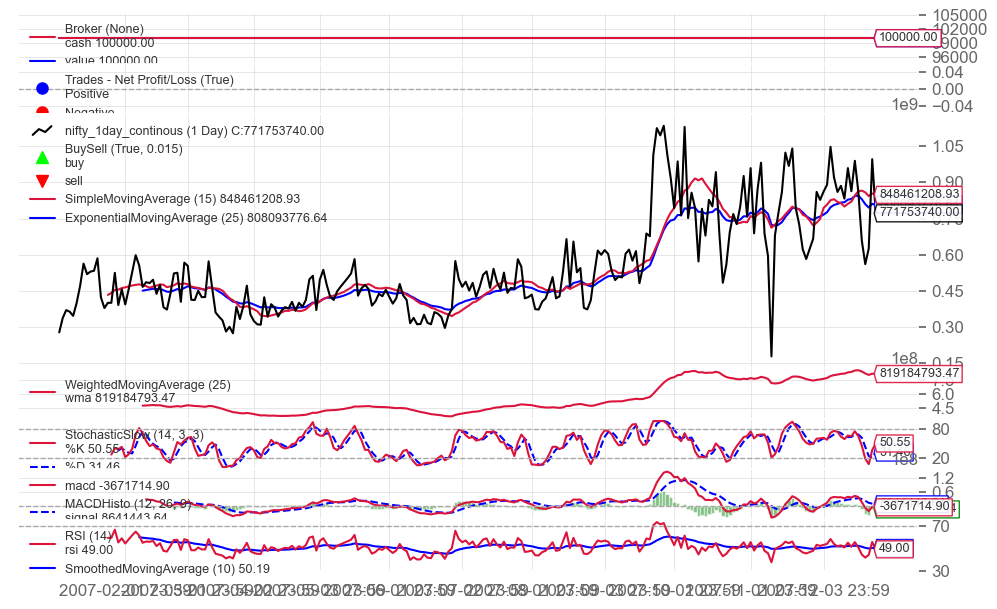

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

import pandas as pd
import quantstats

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order is not None:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='../Data/Nifty/nifty_1day_continous.csv',
        # Do not pass values before this date
        fromdate=datetime.datetime(2007, 1, 2),
        # Do not pass values before this date
        todate=datetime.datetime(2022, 11, 7),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    '''# Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Create an instance of an Analyzer subclass and add it to the Cerebro object
    cerebro.addanalyzer(bt.analyzers.SharpeRatio)

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())'''

    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')
    results = cerebro.run()
    strat = results[0]
    portfolio_stats = strat.analyzers.getbyname('PyFolio')
    returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
    returns.index = returns.index.tz_convert(None)

    quantstats.reports.html(returns, output='stats.html', title='Nifty Sentiment')
    data = cerebro.plot()
    data[0][0].savefig("data.png")